
# <center>Regresi Nonlinear </center>


Jika data menunjukkan tren yang berbentuk kurva, maka regresi linier tidak akan memberikan hasil yang sangat akurat jika dibandingkan dengan regresi non-linier karena sesuai dengan namanya, regresi linier mengandaikan bahwa data tersebut linier. Contoh berikut membahas tentang regresi non linier dan menerapkannya dalam python. Dalam notebook ini, akan dibuat model non-linier terhadap titik data yang sesuai dengan PDB China dari tahun 1960 hingga 2014.

### Mengimpor libraries yang diperlukan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Meskipun regresi linier sangat baik untuk menyelesaikan banyak masalah, namun tidak dapat digunakan untuk semua jenis dataset. Pertama, perlu diingat kembali bagaimana regresi linier dapat memodelkan kumpulan data. Regresi linier memodelkan hubungan linier antara variabel dependen y dan variabel independen x. Regresi linier memiliki persamaan sederhana, sebagai contoh derajat 1, misalnya y = 2*(x) + 3.

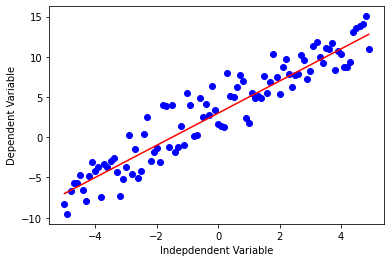

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


Regresi nonlinier adalah hubungan antara variabel bebas $x$ dan variabel terikat $y$ yang menghasilkan fungsi nonlinier sebagai model dari data. Pada dasarnya setiap hubungan yang tidak linier dapat disebut sebagai non-linier, dan biasanya diwakili oleh polinomial derajat $k$ (pangkat maksimum $x$).

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Fungsi non-linier dapat memiliki elemen seperti eksponensial, logaritma, pecahan, dan lain-lain. Contoh: $$ y = \log(x)$$
    
Atau bahkan lebih rumit seperti :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

Mari kita lihat grafik fungsi kubik.

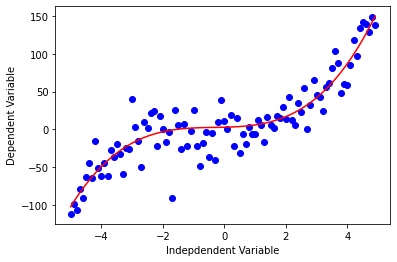

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Seperti yang Anda lihat, fungsi ini memiliki $x^3$ dan $x^2$ sebagai variabel independen. Selain itu, grafik fungsi ini bukan garis lurus di atas bidang 2D. Jadi ini adalah fungsi non-linier.

Beberapa jenis fungsi non-linier lainnya adalah:

### Kuadratik

$$ Y = X^2 $$

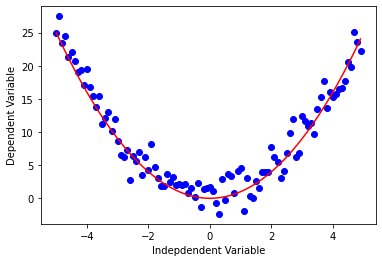

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Eksponensial

Fungsi eksponensial dengan basis c didefinisikan oleh $$ Y = a + b c^X$$ di mana b 0, c > 0 , c 1, dan x adalah bilangan real apa pun. Basis, c, adalah konstan dan eksponen, x, adalah variabel.


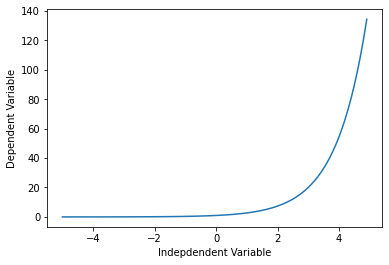

In [5]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logaritmik

Respon $y$ adalah hasil penerapan peta logaritmik dari input $x$ ke variabel output $y$. Berikut adalah salah satu bentuk paling sederhana dari __log()__: yaitu $$ y = \log(x)$$

Perlu dipertimbangkan bahwa alih-alih $x$, kita dapat menggunakan $X$, yang dapat berupa representasi polinomial dari $x$. Dalam bentuk umum itu akan ditulis sebagai
\begin{equation}
y = \log(X)
\end{equation}

<ipython-input-6-0b6a51fd782b>:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


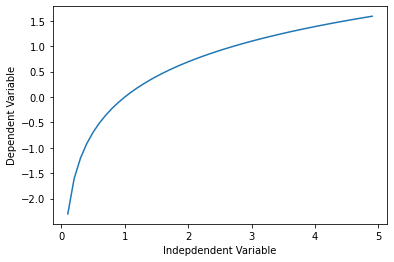

In [6]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoid/logistik

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

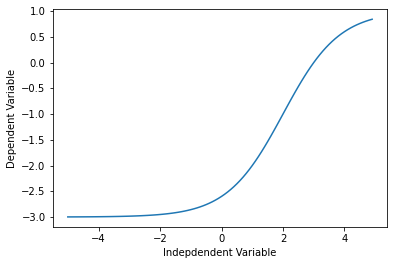

In [7]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<a id="ref2"></a>
# Contoh Regresi Non Linier

Sebagai contoh, kita akan mencoba dan menyesuaikan model non-linier ke titik data yang sesuai dengan PDB Tiongkok dari tahun 1960 hingga 2014. Kita mengunduh kumpulan data dengan dua kolom, yang pertama, satu tahun antara 1960 dan 2014, yang kedua, Pendapatan domestik bruto tahunan China yang sesuai dalam dolar AS untuk tahun itu.

In [8]:
import numpy as np
import pandas as pd

In [ ]:
#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
  

In [9]:
#Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
# load dataset
dataset = '/content/gdrive/MyDrive/Machine Learning 2023/Regression/china_gdp.csv'
df = pd.read_csv(dataset)

df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Memplot dataset ###
Berikut adalah apa yang terlihat seperti titik-titik data. Hasil plotting terlihat seperti fungsi logistik atau eksponensial. Pertumbuhannya mulai lambat, kemudian dari tahun 2005 ke depan, pertumbuhannya sangat signifikan. Dan akhirnya, sedikit melambat di tahun 2010-an.

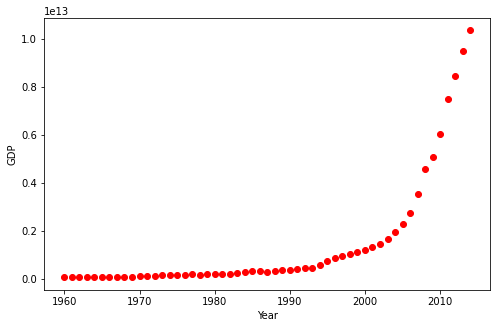

In [11]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Pemilihan Model ###

Dari tampilan awal plot, kita dapat menentukan bahwa fungsi logistik bisa menjadi pendekatan yang baik,
karena memiliki sifat mulai dengan pertumbuhan lambat, pertumbuhan meningkat di tengah, dan kemudian menurun lagi di akhir; seperti diilustrasikan di bawah ini:

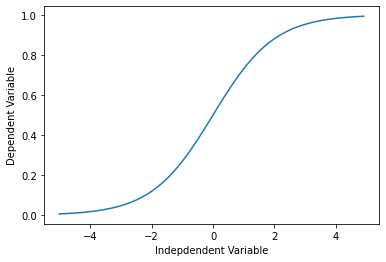

In [12]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


Rumus untuk fungsi logistik adalah sebagai berikut:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Mengontrol kecuraman kurva,

$\beta_2$: Menggeser kurva pada sumbu x.

### Pembuatan Model ###
Model regresi dan inisialisasi parameternya dapat dibuat.

In [13]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Contoh garis sigmoid yang mungkin cocok dengan data dapat dilihat:

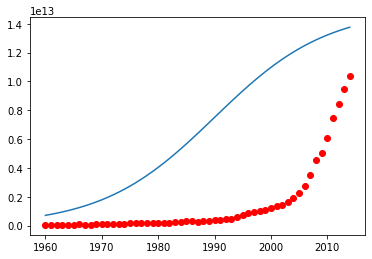

In [14]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Tugas yang harus dilakukan adalah menemukan parameter terbaik untuk model. Normalisasi x dan y diperlukan:

In [15]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### Bagaimana menemukan parameter terbaik untuk pencocokan kurva?


__curve_fit__ yang menggunakan least square non-linear agar sesuai dengan fungsi sigmoid, terhadap data dapat digunakan. Nilai optimal untuk parameter sehingga jumlah residu kuadrat dari sigmoid(xdata, *popt) - ydata diminimalkan.

popt adalah parameter yang dioptimalkan.

In [16]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451709, beta_2 = 0.997207


Hasil model regressi dapat diplot:

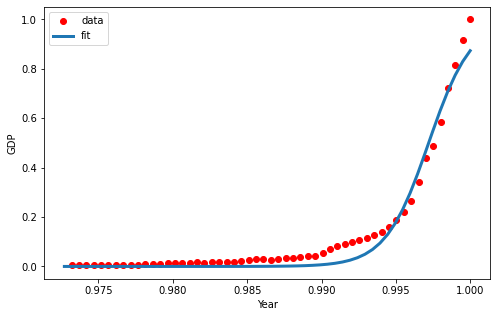

In [17]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Latihan
Hitung akurasi dari model!

In [18]:
# write your code here

# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.96


Double-click __here__ for the solution.

<!-- Your answer is below:
    
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

-->